 
  <img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" 
     style="float: right; margin-right: 30px;" 
     width="120"
     />

 ---
 
 # **OPTIMIZACIÓN: TAREA 4**
 EZAU FARIDH TORRES TORRES.
     
<p align="right"> Maestría en Ciencias con Orientación en Matemáticas Aplicadas. </p>
<p align="right"> CENTRO DE INVESTIGACIÓN EN MATEMÁTICAS. </p>

---

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "dark")

def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels,
                    secuencia1 = None, secuencia2 = None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = mX.copy()
    for i,y in enumerate(ay):
        for j,x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x,y]))
    
    fig, ax = plt.subplots(figsize=(8, 5))
    CS = ax.contour(mX, mY, mZ, levels, cmap='brg_r')
    if secuencia1 is not None:
        puntos1 = np.array(secuencia1)
        ax.plot(puntos1[:,0], puntos1[:,1], '.-',
                    color='#000000', label='Trayectoria 1')
    if secuencia2 is not None:
        puntos2 = np.array(secuencia2)
        ax.plot(puntos2[:,0], puntos2[:,1], '.-',
                    color='#FF0000', label='Trayectoria 2')
    ax.plot()
    ax.grid(True)
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel('Nivel')
    return ax

---

# **1.- Ejercicio 1:**

---

Para cada función $f(\mathbf{x})$ calcule de manera analítica la Hessiana y en cada caso programe la función recibe un punto $\mathbf{x}$ y devuelve $\nabla^2 f(\mathbf{x})$.

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
   

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$

**Función de Hartmann de dimensión 6 ([Referencia](https://www.sfu.ca/~ssurjano/hart6.html)):** 
Para $\mathbf{x}=(x_1,x_2, ..., x_6)$

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + 
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$
$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix}, \quad
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$ 

Esta función tiene 6 óptimos locales. El óptimo global es 
$\mathbf{x}_* = (0.20169, 0.15001,  0.476874, 0.275332, 0.311652, 0.6573)$,
y $f(\mathbf{x}_*) = -3.0424$.

*NOTA:* Para esta función necesita calcular el gradiente y programar esta función
para usarla en los siguientes ejercicios.

>Se tiene que
>$$
>f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + \sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right].$$
>Entonces,
>\begin{align*}
>\frac{\partial f(\mathbf{x})}{\partial x_k}
>&= -\frac{1}{1.94} \sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right) \left( -2a_{ik}(x_k-p_{ik}) \right)\\
>&= \frac{2}{1.94} \sum_{i=1}^{4} \alpha_i a_{ik}(x_k-p_{ik}) \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right).
>\end{align*}
>Para $\ell \neq k$:
>\begin{align*}
>\frac{\partial^2 f(\mathbf{x})}{\partial x_\ell \partial x_k}
>&= \frac{2}{1.94} \sum_{i=1}^{4} \alpha_i a_{ik}(x_k-p_{ik}) \frac{\partial}{\partial x_\ell} \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\\
>&= \frac{2}{1.94} \sum_{i=1}^{4} \alpha_i a_{ik}(x_k-p_{ik}) \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\left( -2a_{i\ell}(x_\ell-p_{i\ell}) \right)\\
>&= \frac{2}{1.94} \sum_{i=1}^{4} -2\alpha_i a_{ik} a_{i\ell} (x_k-p_{ik}) (x_\ell-p_{i\ell}) \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right).\\
>\end{align*}
>Para $\ell = k$:
>\begin{align*}
>\frac{\partial^2 f(\mathbf{x})}{\partial x_k^2}
>&= \frac{2}{1.94} \sum_{i=1}^{4} \alpha_i a_{ik} \frac{\partial}{\partial x_k} \left[ (x_k-p_{ik}) \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right) \right]\\
>&= \frac{2}{1.94} \sum_{i=1}^{4} \alpha_i a_{ik} \left[\exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right) + (x_k-p_{ik})\exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right) \left( -2a_{ik}(x_k-p_{ik}) \right) \right]\\
>&= \frac{2}{1.94} \sum_{i=1}^{4} \alpha_i a_{ik} \left[1 -2a_{ik} (x_k-p_{ik})^2\right] \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right).\\
>\end{align*}

In [33]:
def f_Himmelblau(x: np.array):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
def grad_Himmelblau(x: np.array):
    x1 = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    x2 = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([x1,x2], dtype = float)
def Hess_Himmelblau(x: np.array):
    x11 = 12*x[0]**2 + 4*x[1] - 42
    x12 = 4*x[0] + 4*x[1]
    x22 = 4*x[0] + 12*x[1]**2 - 26
    return np.array([[x11, x12], [x12, x22]], dtype = float)

In [34]:
def f_Beale(x: np.array):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
def grad_Beale(x: np.array):
    x1 = 2*(x[1] - 1)*(1.5 - x[0] + x[0]*x[1]) + 2*(x[1]**2 - 1)*(2.25 - x[0] + x[0]*x[1]**2) + 2*(x[1]**3 - 1)*(2.625 - x[0] + x[0]*x[1]**3)
    x2 = 2*x[0]*(1.5 - x[0] + x[0]*x[1]) + 4*x[0]*x[1]*(2.25 - x[0] + x[0]*x[1]**2) + 6*x[0]*(x[1]**2)*(2.625 - x[0] + x[0]*x[1]**3)
    return np.array([x1,x2], dtype = float)
def Hess_Beale(x: np.array):
    x11 = 2*(x[1]**3 - 1)**2 + 2*(x[1]**2 - 1)**2 + 2*(x[1] - 1)**2
    x12 = 4*x[0]*x[1]*(x[1]**2 - 1) + 4*x[1]*(x[0]*x[1]**2 - x[0]+2.25) + 6*x[0]*x[1]**2*(x[1]**3 - 1) + 6*x[1]**2*(x[0]*x[1]**3 - x[0]+2.625) + 2*x[0]*(x[1]-1) + 2*(x[0]*x[1] - x[0]+1.5)
    x22 = 18*x[0]**2*x[1]**4 + 8*x[0]**2*x[1]**2 + 2*x[0]**2 + 12*x[0]*x[1]*(x[0]*x[1]**3 - x[0] + 2.625) + 4*x[0]*(x[0]*x[1]**2 - x[0]+2.25)
    return np.array([[x11, x12], [x12, x22]], dtype = float)

In [35]:
def f_Rosenbrock(x: np.array):
    n = len(x)
    s = 0
    for i in range(n-1):
        s = s + 100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return s
def grad_Rosenbrock(x: np.array):
    n = len(x)
    grad = np.zeros(n)
    grad[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1-x[0])
    grad[n-1] = 200*(x[n-1] - x[n-2]**2)
    for j in range(1,n-1):
        grad[j] = 200*(x[j]-x[j-1]**2) - 400*x[j]*(x[j+1] - x[j]**2) - 2*(1-x[j])
    return np.array(grad, dtype = float)
def Hess_Rosenbrock(x: np.array):
    n = len(x)
    Hess = np.zeros((n,n))
    Hess[0,0] = -400*(x[1]-x[0]**2) + 800*x[0]**2 + 2
    Hess[1,0] = -400*x[0]
    Hess[n-2,n-1] = -400*x[n-2]
    Hess[n-1,n-1] = 200
    for j in range(1,n-1):
        Hess[j-1,j] = -400*x[j-1]
        Hess[j,j] = -400*(x[j+1]-x[j]**2) +800*x[j]**2 + 202
        Hess[j+1,j] = -400*x[j]
    return np.array(Hess, dtype = float)

In [36]:
alpha = np.array([1.0, 1.2, 3.0, 3.2], dtype = float)
A = np.array(
    [[10, 3, 17, 3.5, 1.7, 8],
    [0.05, 10, 17, 0.1, 8, 14],
    [3, 3.5, 1.7, 10, 17, 8],
    [17, 8, 0.05, 10, 0.1, 14]], dtype = float)
P = 10**(-4) * np.array(
    [[1312, 1696, 5569, 124, 8283, 5886],
    [2329, 4135, 8307, 3736, 1004, 9991],
    [2348, 1451, 3522, 2883, 3047, 6650],
    [4047, 8828, 8732, 5743, 1091, 381]], dtype = float)
def f_Hartman(x: np.array):
    result = 0
    for i in range(4):
        inner_sum = 0
        for j in range(6):
            inner_sum += A[i][j] * (x[j] - P[i][j])**2
        result += alpha[i] * np.exp(-inner_sum)
    return -(2.58 + result)/1.94
def grad_Hartman(x: np.array):
    grad = np.zeros(6)
    for k in range(6):
        for i in range(4):
            inner_sum = 0
            for j in range(6):
                inner_sum += A[i][j] * (x[j] - P[i][j])**2
            grad[k] += alpha[i] * A[i][k] * (x[k] - P[i][k]) * np.exp(-inner_sum)
    return np.array(2*grad/1.94, dtype = float)
def Hess_Hartman(x: np.array):
    hess = np.zeros((6, 6))
    for l in range(6):
        for k in range(6):
            for i in range(4):
                inner_sum = 0
                for j in range(6):
                    inner_sum += A[i][j] * (x[j] - P[i][j])**2
                if k != l:
                    hess[l][k] += -2*alpha[i] * A[i][k] * A[i][l] * (x[k]-P[i][k])*(x[l]-P[i][l]) * np.exp(-inner_sum)
                else:
                    hess[l][l] += alpha[i] * A[i][l] * (1-2*A[i][l]*(x[l]-P[i][l])**2) * np.exp(-inner_sum)
    return np.array(2*hess/1.94, dtype = float)

---

# **2.- Ejercicio 2:**

---

## **2.1** 
Programe el método de Newton "puro" (Algoritmo 1 de la Clase 10).

La función que implementa el algoritmo 
   calcula la dirección de Newton resolviendo el sistema 
   de ecuaciones $\mathbf{H}_k \mathbf{p}_k^N = - \mathbf{g_k}$.
   No use la factorización de Cholesky porque no hay garantía 
   de que la matriz sea definida positiva, y justo queremos 
   ver como se comporta el algoritmo.
- Si la dimensión $n$ de la variable $\mathbf{x}$ es 2, defina un
  arreglo $\mathbf{M}$  en el que se guarde los puntos $\mathbf{x}_0, \mathbf{x}_1,
  ..., \mathbf{x}_k$ generados. Si $n>2$, devolve $\mathbf{M}$ como $None$.
- La función debe devolver el último valor $k$, $\mathbf{x}_k$, 
  $\mathbf{g}_k$,  $\mathbf{M}$.

In [64]:
def NEWTON_PURO(gradf, Hessf, x0: np.array,
        tol: float, maxiter: int):
    xk = x0
    M = None
    if len(x0)==2:
        M = [x0]
    for k in range(maxiter):
        gk = gradf(xk)
        if np.linalg.norm(gk) < tol:
            return k, xk, gk, True, M
        Hk = Hessf(xk)
        pk= np.linalg.solve(Hk, -gk)
        xk = xk + pk
        if len(x0)==2:
            M.append(xk)
    return maxiter, xk, gk, False, M

## **2.2**
Pruebe el algoritmo usando la cantidad de iteraciones máximas $N=1000$ y la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   y los puntos iniciales siguientes:

En cada caso imprima los resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
- Si $n=2$, genere la gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.




In [38]:
eps = np.finfo(float).eps
N = 1000

### **Función de Himmelblau** 
- $\mathbf{x}_0 = (2,4)$

PUNTO INICIAL:   [2. 4.]
ITERACIONES:     6
xk:              [3. 2.]
f(xk):           7.394064262118014e-23
||gradf(xk)||:   6.758096355951128e-11
INDICADORA:      True


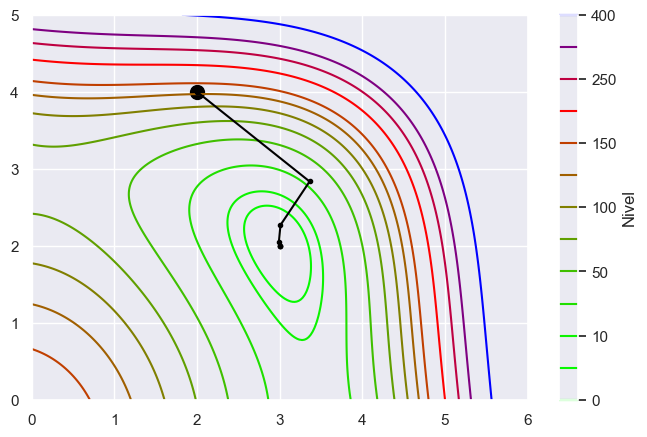

In [39]:
x0 = np.array([2.,4.], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_PURO(gradf = grad_Himmelblau,
                        Hessf = Hess_Himmelblau, x0 = x0,
                        tol = tol, maxiter = N)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Himmelblau(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Himmelblau, xleft=0, xright=6, ybottom=0, ytop=5,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 400],
            secuencia1 = M)
ax.scatter(2,4, s = 100, c = '#000000')
plt.show()

### **Función de Beale**
- $\mathbf{x}_0 = (2,3)$  

PUNTO INICIAL:   [2. 3.]
ITERACIONES:     10
xk:              [2.88586679e-13 1.00000000e+00]
f(xk):           14.203125
||gradf(xk)||:   8.015189705023659e-12
INDICADORA:      True


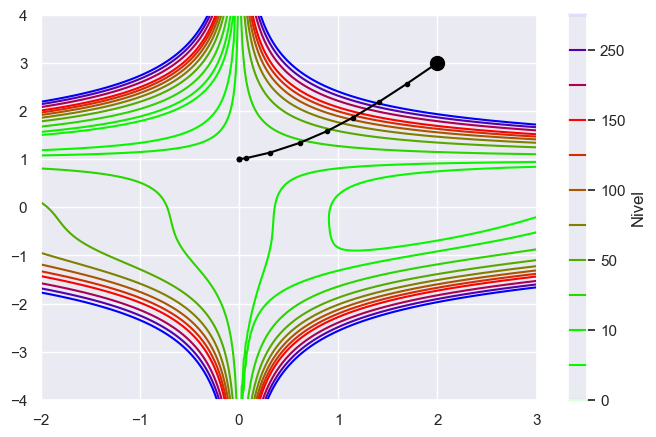

In [40]:
x0 = np.array([2.,3], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_PURO(gradf = grad_Beale,
                        Hessf = Hess_Beale, x0 = x0,
                        tol = tol, maxiter = N)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Beale(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Beale, xleft=-2, xright=3, ybottom=-4, ytop=4,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
            secuencia1 = M)
ax.scatter(2,3, s = 100, c = '#000000')
plt.show()

### **Función de Rosenbrock**
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 

PUNTO INICIAL:   [-1.2  1. ]
ITERACIONES:     6
xk:              [1. 1.]
f(xk):           3.4326461875363225e-20
||gradf(xk)||:   8.285705791275366e-09
INDICADORA:      True


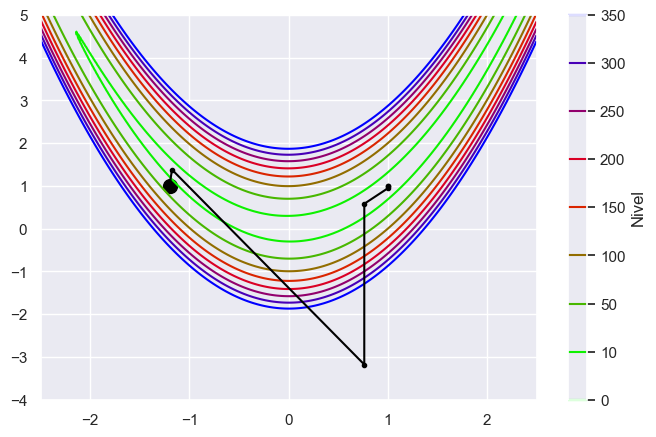

In [41]:
x0 = np.array([-1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_PURO(gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0,
                        tol = tol, maxiter = N)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)
ax = contornosFnc2D(f_Rosenbrock, xleft=-2.5, xright=2.5, ybottom=-4, ytop=5,
            levels=[0, 10, 50, 100, 150, 200, 250, 300, 350],
            secuencia1 = M)
ax.scatter(-1.2, 1.0, s = 100, c = '#000000')
plt.show()

In [42]:
print('--------- x0 = (-1.2, 1.0) x 10 ---------')
x0 = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_PURO(gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0,
                        tol = tol, maxiter = N)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

print('\n--------- x0 = (-1.2, 1.0) x 20 ---------')
x0 = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_PURO(gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0,
                        tol = tol, maxiter = N)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

--------- x0 = (-1.2, 1.0) x 10 ---------
PUNTO INICIAL:   [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]
ITERACIONES:     34
xk:              [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(xk):           4.218211823539767e-26
||gradf(xk)||:   2.605615622683699e-13
INDICADORA:      True

--------- x0 = (-1.2, 1.0) x 20 ---------
PUNTO INICIAL:   [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]
ITERACIONES:     46
xk:              [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(xk):           2.1336222295899554e-29
||gradf(xk)||:   9.730292534480143e-14
INDICADORA:      True


### **Función de Hartmann de dimensión 6**
- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

In [43]:
x0 = np.array([0,0,0,0,0,0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_PURO(gradf = grad_Hartman,
                        Hessf = Hess_Hartman, x0 = x0,
                        tol = tol, maxiter = N)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Hartman(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

PUNTO INICIAL:   [0. 0. 0. 0. 0. 0.]
ITERACIONES:     14
xk:              [-0.19076654 -0.13889587 -0.19177065 -0.24983657 -0.2596438  -0.54614109]
f(xk):           -1.3298969080669978
||gradf(xk)||:   2.464089230849256e-08
INDICADORA:      True


---

# **3.- Ejercicio 3:**

---

Modifique la función que implementa el método de Newton del Ejercicio 2 
para incluir el cálculo del tamaño de paso (Newton amortiguado).

## **3.1**
Además de los parámetros que se mencionan en el Algoritmo 1, la
   función que implementa el método debe recibir los parámetros
   del algoritmo de backtracking: $\rho>0$, $c_1>0$ y el número de
   iteraciones máximas $N_b$. Fijamos el valor inicial $\alpha_{ini}=1$ 
   para el algoritmo de backtracking para intentar dar el paso completo
   como lo hace el método de Newton, pero 
   si ese paso no satisface la condición de descenso, dejamos que lo recorte.
   
   No tenemos garantizado que la matriz Hessiana $\mathbf{H}_k$ sea
   definida positiva, así que agregamos los siguientes pasos al algoritmo
   después de calcular la dirección $\mathbf{p}_k$:
- Si $\mathbf{g}_k^\top\mathbf{p}_k>0$, hacer $\mathbf{p}_k = -\mathbf{p}_k$
  para que sea dirección de descenso.
- Calcular $\alpha_k$ usando el algoritmo de backtracking.
- Calcular $\mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha_k \mathbf{p}_{k}$.
   



In [44]:
def BACKTRAKING(alpha_init: float, p: float, c: float, 
                xk: np.array, f, fxk: np.array,
                gradfxk: np.array, pk: np.array, Nb: int):
    alpha = alpha_init
    for i in range(Nb):
        if f(xk + alpha*pk) <= fxk + c*alpha*(gradfxk.T)@pk:
            return alpha, i
        alpha = p*alpha
    return alpha, Nb
def NEWTON_AMORTIGUADO(f, gradf, Hessf, x0: np.array,
        tol: float, maxiter: int, alpha_init: float,
        p: float, c: float, Nb: int):
    xk = x0
    M = None
    if len(x0)==2:
        M = [x0]
    for k in range(maxiter):
        gk = gradf(xk)
        if np.linalg.norm(gk) < tol:
            return k, xk, gk, True, M
        Hk = Hessf(xk)
        pk= np.linalg.solve(Hk, -gk)
        if gk.T@pk > 0:
            pk = -pk
        ak, k1 = BACKTRAKING(alpha_init, p, c, xk, f, f(xk), gk, pk, Nb)
        xk = xk + ak*pk
        if len(x0)==2:
            M.append(xk)
    return maxiter, xk, gk, False, M

## **3.2**

Pruebe el algoritmo usando los puntos iniciales del Ejercicio 2, 
   fijando la cantidad de iteraciones máximas $N=1000$, la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina.
   Para el algoritmo de backtracking use $\rho=0.5, c_1=0.1$ y $N_b=500$.
   
   Imprima los mismos datos que se piden en el Ejercicio 2 para 
   que pueda comparar los resultados

In [45]:
N = 10000
eps = np.finfo(float).eps
rho = 0.5
c = 0.1
Nb = 500

### **Función de Himmelblau** 
- $\mathbf{x}_0 = (2,4)$

PUNTO INICIAL:   [2. 4.]
ITERACIONES:     6
xk:              [3. 2.]
f(xk):           7.394064262118014e-23
||gradf(xk)||:   6.758096355951128e-11
INDICADORA:      True


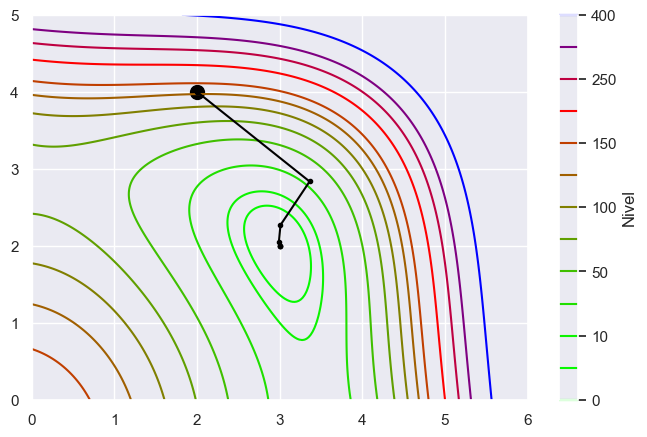

In [46]:
x0 = np.array([2.,4.], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_AMORTIGUADO(f = f_Himmelblau, gradf = grad_Himmelblau,
                        Hessf = Hess_Himmelblau, x0 = x0, tol = tol,
                        maxiter = N, alpha_init = 1, p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Himmelblau(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Himmelblau, xleft=0, xright=6, ybottom=0, ytop=5,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 400],
            secuencia1 = M)
ax.scatter(2,4, s = 100, c = '#000000')
plt.show()

### **Función de Beale**
- $\mathbf{x}_0 = (2,3)$  

PUNTO INICIAL:   [2. 3.]
ITERACIONES:     10
xk:              [2.88586679e-13 1.00000000e+00]
f(xk):           14.203125
||gradf(xk)||:   8.015189705023659e-12
INDICADORA:      True


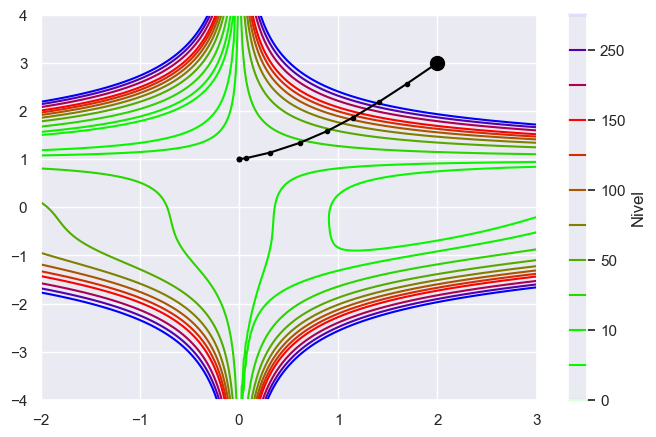

In [47]:
x0 = np.array([2.,3.], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_AMORTIGUADO(f = f_Beale, gradf = grad_Beale,
                        Hessf = Hess_Beale, x0 = x0, tol = tol,
                        maxiter = N, alpha_init = 1, p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Beale(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Beale, xleft=-2, xright=3, ybottom=-4, ytop=4,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
            secuencia1 = M)
ax.scatter(2,3, s = 100, c = '#000000')
plt.show()

### **Función de Rosenbrock**
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 

PUNTO INICIAL:   [-1.2  1. ]
ITERACIONES:     21
xk:              [1. 1.]
f(xk):           7.682025128905186e-24
||gradf(xk)||:   1.2166683130616293e-10
INDICADORA:      True


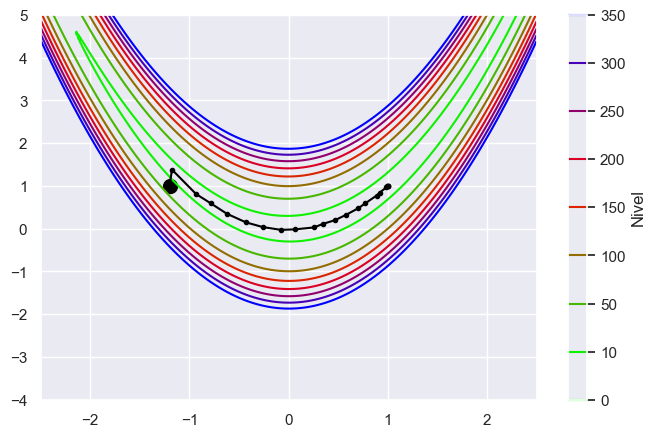

In [48]:
x0 = np.array([-1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_AMORTIGUADO(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0, tol = tol,
                        maxiter = N, alpha_init = 1, p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)
ax = contornosFnc2D(f_Rosenbrock, xleft=-2.5, xright=2.5, ybottom=-4, ytop=5,
            levels=[0, 10, 50, 100, 150, 200, 250, 300, 350],
            secuencia1 = M)
ax.scatter(-1.2, 1.0, s = 100, c = '#000000')
plt.show()

In [49]:
print('--------- x0 = (-1.2, 1.0) x 10 ---------')
x0 = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_AMORTIGUADO(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0, tol = tol,
                        maxiter = N, alpha_init = 1, p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

print('\n--------- x0 = (-1.2, 1.0) x 20 ---------')
x0 = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_AMORTIGUADO(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0, tol = tol,
                        maxiter = N, alpha_init = 1, p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

--------- x0 = (-1.2, 1.0) x 10 ---------
PUNTO INICIAL:   [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]
ITERACIONES:     38
xk:              [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(xk):           9.31431366843056e-26
||gradf(xk)||:   6.063324945599207e-12
INDICADORA:      True

--------- x0 = (-1.2, 1.0) x 20 ---------
PUNTO INICIAL:   [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]
ITERACIONES:     51
xk:              [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(xk):           2.1192353956127703e-20
||gradf(xk)||:   9.40451967109109e-10
INDICADORA:      True


### **Función de Hartmann de dimensión 6**
- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

In [50]:
x0 = np.array([0,0,0,0,0,0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_AMORTIGUADO(f = f_Hartman, gradf = grad_Hartman,
                        Hessf = Hess_Hartman, x0 = x0, tol = tol,
                        maxiter = N, alpha_init = 1, p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Hartman(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

PUNTO INICIAL:   [0. 0. 0. 0. 0. 0.]
ITERACIONES:     9
xk:              [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053]
f(xk):           -3.042457737843049
||gradf(xk)||:   1.6269609112721315e-08
INDICADORA:      True


---

# **4.- Ejercicio 4:**

---

Programe el método de Newton con modificación de los eigenvalores 
de la Hessiana de acuerdo al Algoritmo 4 de la Clase 11.

## **4.1**
Además de los parámetros que se mencionan en el Algoritmo 4, la
   función que implementa el método debe recibir los parámetros
   del algoritmo de backtracking: $\rho>0$, $c_1>0$ y el número de
   iteraciones máximas $N_b$. Fijamos el valor inicial $\alpha_{ini}=1$ 
   para el algoritmo de backtracking para intentar dar el paso completo.
   
- Puede usar la función [eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
  de la librería Numpy para calcular la descomposión espectral de 
  la Hessiana $\mathbf{H}_k$ y a partir de ésta calcular la Hessiana modificada.

In [51]:
def NEWTON_EIG(f, gradf, Hessf, x0: np.array,
            tol: float, maxiter: int, delta: float,
            alpha_init: float, p: float, c: float, Nb: int):
    xk = x0
    M = None
    if len(x0)==2:
        M = [x0]
    for k in range(maxiter):
        gk = gradf(xk)
        if np.linalg.norm(gk) < tol:
            return k, xk, gk, True, M
        Hk = Hessf(xk)
        eigvals, eigvects = np.linalg.eig(Hk)
        for i in range(len(x0)):
            if eigvals[i] < delta:
                eigvals[i] = delta
        D_hat = np.diag(eigvals)
        Hk_hat = eigvects@D_hat@eigvects.T
        L = np.linalg.cholesky(Hk_hat)
        pk = np.linalg.solve(L.T, np.linalg.solve(L, -gk))
        ak, k1 = BACKTRAKING(alpha_init, p, c, xk, f, f(xk), gk, pk, Nb)
        xk = xk + ak*pk
        if len(x0)==2:
            M.append(xk)
    return maxiter, xk, gk, False, M

## **4.2**
Pruebe el algoritmo usando la cantidad de iteraciones máximas $N=1000$, la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   $\delta = 0.005$, para backtracking  use $\rho=0.5, c_1=0.1$ y $N_b=500$
   y los puntos iniciales del Ejercicio 2.
   
   Imprima los mismos datos que se piden en el Ejercicio 2 para 
   que pueda comparar los resultados.

In [52]:
N = 1000
eps = np.finfo(float).eps
rho = 0.5
c = 0.1
Nb = 500
delta = 0.005

### **Función de Himmelblau** 
- $\mathbf{x}_0 = (2,4)$

PUNTO INICIAL:   [2. 4.]
ITERACIONES:     6
xk:              [3. 2.]
f(xk):           7.394064262118014e-23
||gradf(xk)||:   6.758096355951128e-11
INDICADORA:      True


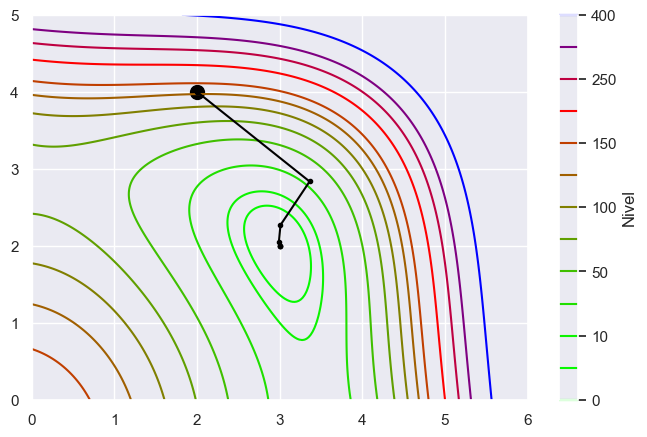

In [53]:
x0 = np.array([2.,4.], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_EIG(f = f_Himmelblau, gradf = grad_Himmelblau,
                        Hessf = Hess_Himmelblau, x0 = x0, tol = tol,
                        maxiter = N, delta = delta, alpha_init = 1,
                        p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Himmelblau(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Himmelblau, xleft=0, xright=6, ybottom=0, ytop=5,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 400],
            secuencia1 = M)
ax.scatter(2,4, s = 100, c = '#000000')
plt.show()

### **Función de Beale**
- $\mathbf{x}_0 = (2,3)$  

PUNTO INICIAL:   [2. 3.]
ITERACIONES:     119
xk:              [3.  0.5]
f(xk):           2.054686382100747e-21
||gradf(xk)||:   3.861310733477998e-10
INDICADORA:      True


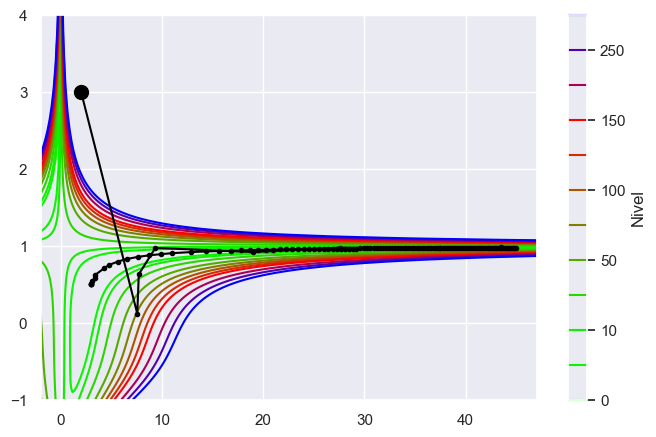

In [54]:
x0 = np.array([2.,3.], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_EIG(f = f_Beale, gradf = grad_Beale,
                        Hessf = Hess_Beale, x0 = x0, tol = tol,
                        maxiter = N, delta = delta, alpha_init = 1,
                        p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Beale(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Beale, xleft=-2, xright=47, ybottom=-1, ytop=4,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
            secuencia1 = M)
ax.scatter(2,3, s = 100, c = '#000000')
plt.show()

### **Función de Rosenbrock**
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 

PUNTO INICIAL:   [-1.2  1. ]
ITERACIONES:     21
xk:              [1. 1.]
f(xk):           7.682025128905186e-24
||gradf(xk)||:   1.2166683130616293e-10
INDICADORA:      True


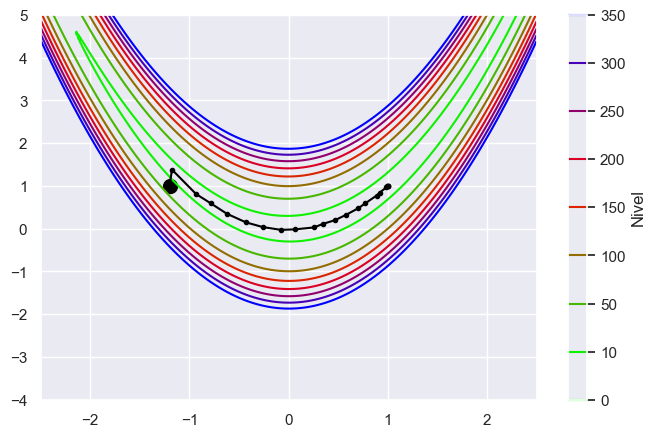

In [55]:
x0 = np.array([-1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_EIG(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0, tol = tol,
                        maxiter = N, delta = delta, alpha_init = 1,
                        p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)
ax = contornosFnc2D(f_Rosenbrock, xleft=-2.5, xright=2.5, ybottom=-4, ytop=5,
            levels=[0, 10, 50, 100, 150, 200, 250, 300, 350],
            secuencia1 = M)
ax.scatter(-1.2, 1.0, s = 100, c = '#000000')
plt.show()

In [56]:
print('--------- x0 = (-1.2, 1.0) x 10 ---------')
x0 = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_EIG(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0, tol = tol,
                        maxiter = N, delta = delta, alpha_init = 1,
                        p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

print('\n--------- x0 = (-1.2, 1.0) x 20 ---------')
x0 = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_EIG(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, x0 = x0, tol = tol,
                        maxiter = N, delta = delta, alpha_init = 1,
                        p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

--------- x0 = (-1.2, 1.0) x 10 ---------
PUNTO INICIAL:   [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]
ITERACIONES:     26
xk:              [-0.99326337  0.99660604  0.99824061  0.99898843  0.99922615  0.99907365
  0.99845418  0.99705625  0.99417938  0.98839263]
f(xk):           3.986579112347139
||gradf(xk)||:   9.245494547339565e-13
INDICADORA:      True

--------- x0 = (-1.2, 1.0) x 20 ---------
PUNTO INICIAL:   [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]
ITERACIONES:     41
xk:              [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998724  0.99999363  0.99999679
  0.99999834  0.99999905  0.99999927  0.99999913  0.99999855  0.99999724
  0.99999453  0.99998905]
f(xk):           3.9866238542611976
||gradf(xk)||:   1.5201229883773423e-09
INDICADORA:      True


### **Función de Hartmann de dimensión 6**
- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

In [57]:
x0 = np.array([0,0,0,0,0,0], dtype = float)
tol = (len(x0)*eps)**(1/2)
k, xk, gk, ind, M = NEWTON_EIG(f = f_Hartman, gradf = grad_Hartman,
                        Hessf = Hess_Hartman, x0 = x0, tol = tol,
                        maxiter = N, delta = delta, alpha_init = 1,
                        p = rho, c = c, Nb = Nb)
print("PUNTO INICIAL:  ", x0)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Hartman(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

PUNTO INICIAL:   [0. 0. 0. 0. 0. 0.]
ITERACIONES:     6
xk:              [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053]
f(xk):           -3.042457737843049
||gradf(xk)||:   1.88880230654837e-14
INDICADORA:      True


## **4.3**
¿Hay alguna ventaja de este algoritmo comparado con los implementados
   en los ejercicios 1 y 2, o basta con usar alguno de los anteriores?

>$\bf \it Respuesta:$
>Sí existe una ventaja importante:
>
>En el análsis a la función Himmelblau, todos los algoritmos convergen al mínimo $[3,2]$ en $6$ iteraciones. En el de la función Beale, los primeros dos algoritmos "convergen" al punto $[1,0]$ en $10$ iteraciones, sin embargo, no es punto mínimo. Aquí resalta la ventaja importante del algoritmo de modificación de la Hessiana, ya que, aunque necesita de $119$ iteraciones, logra llegar al mínimo global $[3,0.5]$. En el caso de la función Rosenbrock $2$-dimensional, la mejor opción resultó ser Newton Puro ya que necesita 15 iteraciones menos que los otros 2. En los casos $10$-dimensional y $20$-dimensional, el de mejor rendimiento fue el algoritmo de modificación de la Hessiana, aunque no llega al mínimo global, sino al $[-1,1,1,\dots,1]$. Finalmente, para la función Hartman, se tiene convergencia para Newton Puro pero no al mínimo global buscado. Mientras que en los otros dos algoritmos, sí existe convergencia al mínimo global en $9$ y $6$ iteraciones, respectivamente.